# Corso di Probabilità e Statistica - La distribuzione binomiale

In questo capitolo introduciamo la distribuzione binomiale


In [1]:
import scipy.stats as stats #modulo di statistica
import numpy as np
import matplotlib.pyplot as plt

**Generiamo un processo binomiale empiricamente**

In [40]:
#parametri
n=10  #numero di tentativi
p=0.5 #probabilità di successo
NR=1000 #numero di realizzazioni del processo

In [41]:
bd = np.zeros(n+1) #inizializzazione

In [42]:
for i in range(NR): #loop sulle realizzazioni
    k=0 #k numero di successi
    for j in range(n): #loop su n
        x=np.random.rand() 
        if(x<p): #successo con probabilità p 
            k=k+1 
    bd[k]=bd[k]+1 

In [43]:
bd=bd/NR #normalizzazione

**Confrontiamo il risultato empirico con la distribuzione binomiale teorica**

In [44]:
bd1 = stats.binom(n, p) #distribuzione binomiale

In [45]:
# confrontiamo i valori di B_p^n(k)
k=3
bd[k],bd1.pmf(k)

(0.255, 0.25000000000000006)

In [46]:
# confrontiamo le media
mu1=bd1.mean()
mu=np.average(np.arange(n+1),weights=bd) #media pesata sulla distribuzione empirica 
mu,mu1

(2.04, 2.0)

In [47]:
# confrontiamo la varianza
sigma2_1=bd1.var()
sigma2=np.average(np.arange(n+1)**2,weights=bd)-mu**2
sigma2,sigma2_1

(1.0364000000000004, 1.0)

In [48]:
# calcoliamo i momenti
r=3
mom1=bd1.moment(n=r)
mom=np.average(np.arange(n+1)**r,weights=bd)
mom1,mom

(14.0, 14.771999999999998)

**Grafici**

In [49]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

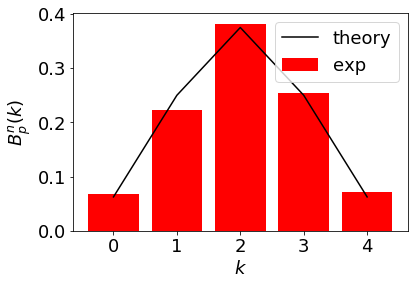

In [50]:
k = np.arange(n+1)
plt.plot(k, bd1.pmf(k), label="theory", color="black") #linee
plt.bar(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

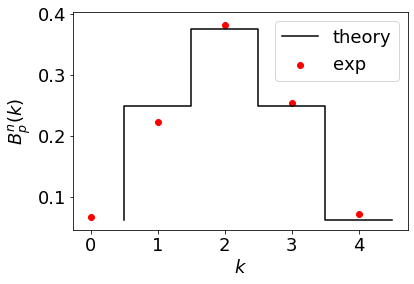

In [51]:
k = np.arange(n+1)
plt.step(k+.5, bd1.pmf(k), label="theory", color='black') #step
plt.scatter(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

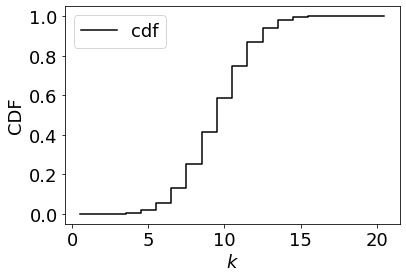

In [87]:
#distribuzione cumulata
plt.step(k+.5, bd1.cdf(k), label="cdf", color='black') #step
plt.xlabel(r'$k$') 
plt.ylabel('CDF') 
plt.legend()

**Esercizio: la distribuzione multinomiale**

Ripetere lo stesso esempio per il caso della distribuzione multinomiale. 
- Utilizzare la funzione scipy.stats.multinomial(n,p) dove p questa volta è un vettore di k componenti che indica le probabilità dei vari casi
- Considerare per semplicità il caso k=3 per cui p=[p1,p2,1-p1-p2]
- Generare la distribuzione empririca  
- Confrontare la distribuzione empirica con quella teorica

Per maggiori informazioni sulla funzione:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html

**Nota**: Esempio di sintassi "if" in python:

if x < 0:

    a=0
    
elif x == 0:

    a=1
    
else:

    a=2